In [ ]:
import main.Constants as Constants
from  openai import OpenAI
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import gspread
import gspread_dataframe as gd
import gspread_formatting as gf
from gspread_formatting import cellFormat, color, textFormat

## Downloading Quiz Score

In [2]:
# No need to provide path for service account.  Json file is in the default directory for gspread at %APPDATA%/gspread/service_account.json
sa = gspread.service_account()
sh = sa.open("New Chinese Words")

sheet_name = "QuizLog"
wks2 = sh.worksheet(sheet_name)
print(f'Sheet {sheet_name} Num Rows: {wks2.row_count}')
print(f'Sheet {sheet_name} Num Columns: {wks2.col_count}')


Sheet QuizLog Num Rows: 989
Sheet QuizLog Num Columns: 24


In [3]:
quiz_history = pd.DataFrame(wks2.get_all_values())
quiz_history.columns = quiz_history.iloc[0]
quiz_history = quiz_history.iloc[1:]
quiz_history.head()

for col in quiz_history.columns:
    quiz_history[col] = pd.to_numeric(quiz_history[col], errors='ignore')   

C:\Users\wongs\AppData\Local\Temp\ipykernel_33760\3291478138.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  quiz_history[col] = pd.to_numeric(quiz_history[col], errors='ignore')


In [ ]:
quiz_history['Pinyin Wrong'] = (quiz_history['Pinyin Correction']!='').astype(int)
quiz_history['Meaning Wrong'] = (quiz_history['Meaning Correction']!='').astype(int)
quiz_history['Last Quiz'] = pd.to_datetime(quiz_history['Last Quiz'])

In [ ]:
score_summary_word = quiz_history.groupby('Word')[['Right Score', 'Wrong Score', 'Pinyin Wrong', 'Meaning Wrong']].sum().reset_index()
top_10_pinyin_wrong = score_summary_word.loc[score_summary_word['Pinyin Wrong']>1].sort_values(by='Pinyin Wrong', ascending=False)['Word'].to_list()[:10]
top_10_meaning_wrong = score_summary_word.loc[score_summary_word['Meaning Wrong']>1].sort_values(by='Meaning Wrong', ascending=False)['Word'].to_list()[:10]

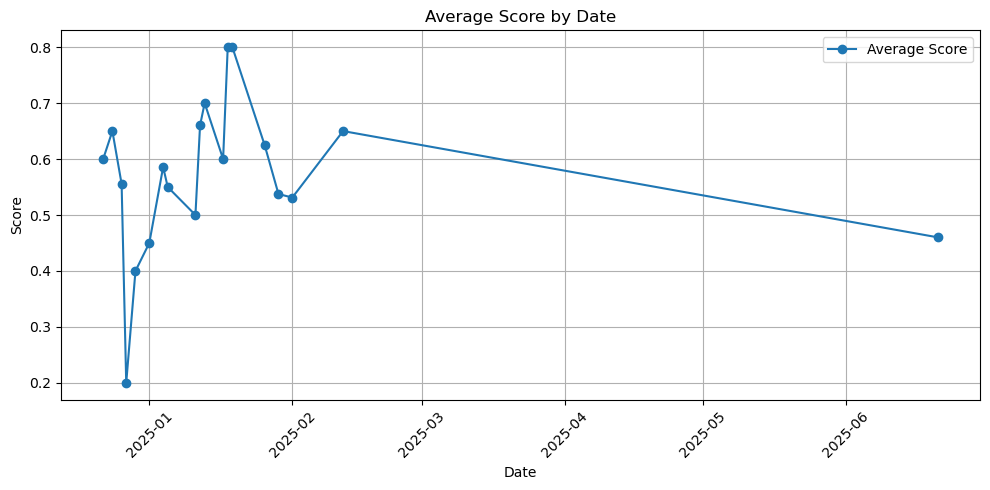

: 

In [ ]:
score_summary_date = quiz_history.groupby('Last Quiz')[['Right Score']].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(score_summary_date['Last Quiz'], score_summary_date['Right Score'], marker='o', linestyle='-', label='Average Score')
plt.title('Average Score by Date')
plt.xlabel('Date')
plt.ylabel('Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
